# Numerical Optimization (CS215300) Assignment 3
## Introduction
In this assignment, we expect you to be able to solve constrained optimization problem by Scipy library. We want you to apply two algorithms on the following problem as a benchmark, survey the methods used in these libraries, and analyze the behavior of these algorithms.
The library document link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

## Task
1. (20%) Solve the following problrem by using **trust-constr** method:
$$\begin{array}{lll}
        \min_{x_1,x_2} & f(x_1,x_2)=-x_1-x_2 \\
        \mbox{s.t. } & -2x_1^4 + 8x_1^3 -8x_1^2 + x_2 - 2 \le 0  \\
         & -4x_1^4 + 32x_1^3 - 88x_1^2 + 96x_1 + x_2 -36 \le 0   \\
         & 0 \le x_1 \le 3 \\
         & 0 \le x_2 \le 4 \\
\end{array}$$
2. (20%) Use **COBYLA** method to solve the same problem.
3. (15%) For the above two algorithms, please include the calculation process in markdown style before your code cells.
4. (5%) Provide the Jacobian and Hessian function in matrix form in markdown style.
5. (40%) In your report, please read the paper cited in the libraries, which gives the details of the algorithms. Write an introduction of the algorithms, and compare their behaviors in this benchmark. You are not necessarily to read the original paper, other resourses (ex. slides from other schools or surveys) are also acceptable. Please include the link or paper name in your reference if you referred to other resources.
6. Rename this notebook file by adding your student ID and upload it to eeclass platform. (ex. hw3_110xxxxxx.ipynb)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from scipy.optimize import Bounds
from scipy.optimize import NonlinearConstraint

### Define objective function

將題目的function寫入 $x = [x_1,x_2]$

所以等於 $-x_1-x_2$

In [ ]:
def f(x):
  object_f = - x[0] - x[1]
  return object_f
  

### Define constraint functions and derivatives
Note: Please do not use sparse matrices.

resources: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


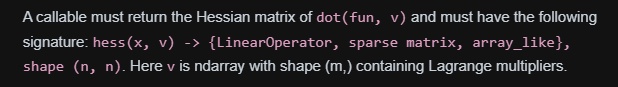

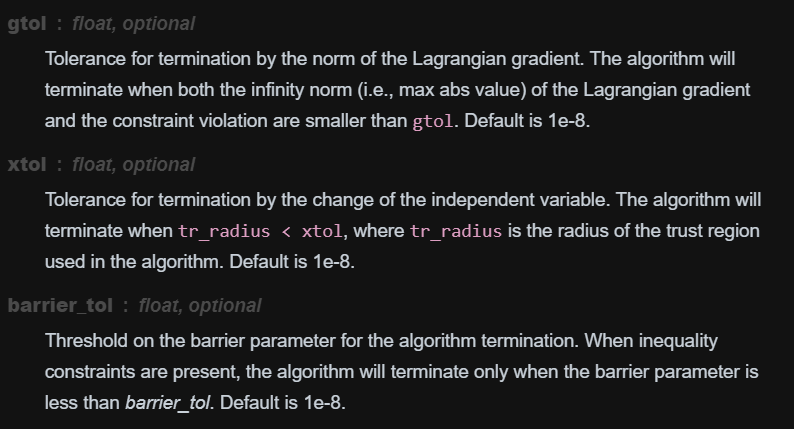

將兩個constrained function寫到cons_f(x)

$-2x_1^4 + 8x_1^3 -8x_1^2 + x_2 - 2 \le 0$\
$-4x_1^4 + 32x_1^3 - 88x_1^2 + 96x_1 + x_2 -36 \le 0$\
根據jacobian

$$
Jacobian\quad constrained = \begin{bmatrix} \frac{\partial C_1}{\partial x_1} && \frac{\partial C_1}{\partial x_2} \\ \frac{\partial C_2}{\partial x_1} && \frac{\partial C_2}{\partial x_2} \end{bmatrix}
= \begin{bmatrix} -8x_1^3+24x_1^2 -16x_1 && 1 \\ -16x_1^3+96x_1^2-176x_1+96 && 1 \end{bmatrix}\\\\
$$
所以可以得出一個2*2矩陣

再來就是hessian
$$
Hessian\quad constrained = v_1 \begin{bmatrix} \frac{\partial^2 C_1}{\partial x_1^2} && \frac{\partial^2 C_1}{\partial x_1\partial x_2} \\ \frac{\partial^2 C_1}{\partial x_1\partial x_2} && \frac{\partial^2 C_1}{\partial x_2^2}\end{bmatrix} + v_2 \begin{bmatrix} \frac{\partial^2 C_2}{\partial x_1^2} && \frac{\partial^2 C_2}{\partial x_1\partial x_2} \\ \frac{\partial^2 C_2}{\partial x_1\partial x_2} && \frac{\partial^2 C_2}{\partial x_2^2} \end{bmatrix}
= v_1 \begin{bmatrix} -24x_1^2+48x_1 -16 && 0 \\ 0 && 0 \end{bmatrix} + v_2 \begin{bmatrix} -48x_1^2+192x_1-176 && 0 \\ 0 && 0 \end{bmatrix}\\
$$
根據助教提供的網址上的說明，其hessian使用到lagrange multiplier來處理問題，所以我的code寫法為先將每個hessian先乘上$v$，這裡的$v = \lambda$也就是lagrange multiplier

在從助教提供的網站上
將NonlinearConstraint的參數填入
這邊要注意的一點就是按照順序的第二個為下限，選擇$-∞$是因為題目設定的範圍限制只有一邊有邊界，要小於0，所以第三個填入0。



In [ ]:
# TODO: derive and define the functions
def cons_f(x):
  #constrained function
  constrain_f = np.array([-2 * x[0]**4 + 8 * x[0]**3 - 8 * x[0] ** 2 + x[1] - 2, 
           -4 * x[0]**4 + 32 * x[0]**3 - 88 * x[0]**2 + 96 * x[0] + x[1] - 36])
  
  return constrain_f
    
def cons_Jacobian(x):
    constrain_J_f = np.array([[-8 * x[0]**3 + 24 * x[0]**2 - 16 * x[0] , 1],
                  [-16 * x[0]**3 + 96 * x[0]**2 - 176 * x[0] + 96, 1]])
    return constrain_J_f

def cons_Hessian(x, v):
  
    constrain_H_f_1 = v[0] * np.array([[-24 * x[0]**2 + 48 * x[0] - 16, 0], [0, 0]])
    constrain_H_f_2 = v[1] * np.array([[-48 * x[0]**2 + 192 * x[0] - 176, 0], [0, 0]])
    #要回傳lagrange multiplier
    #\lambda_1 * f1 + \lambda_2 * f2
    tot_constrain_H_f = constrain_H_f_1 + constrain_H_f_2
    return tot_constrain_H_f
    

# TODO: Insert the functions above into a NonlinearConstraint obeject
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 0, jac=cons_Jacobian, hess=cons_Hessian)

### Define the bounds 

根據網路上的例子，才知道原來兩個constrain要這樣做\
Resource:https://scipy.github.io/devdocs/tutorial/optimize.html#trust-region-constrained-algorithm-method-trust-constr

第一個為$x_1$的邊界\
第二個為$x_2$的邊界


In [ ]:
# TODO: define the bounds
# two range
bounds = Bounds([0, 0], [3, 4])

### Call the minimize library

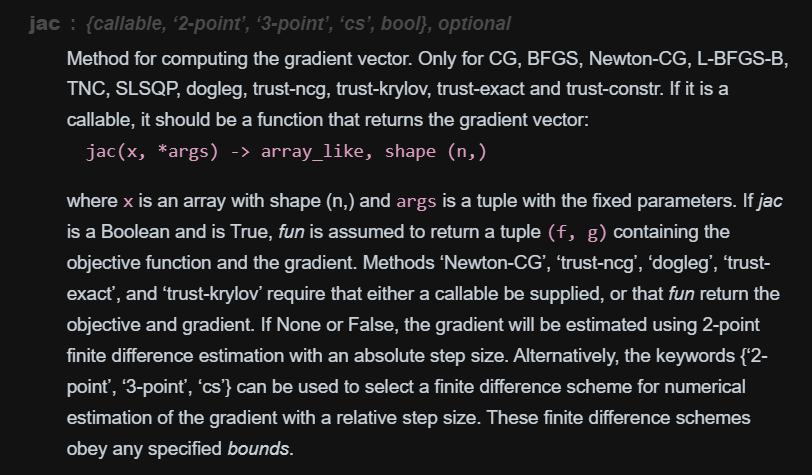

因為要使用minimize function，所以先輸入minimize。
根據此目標函數，雖然會出現warning，但此問題的hessian為零，所以也不需要當輸入函數使用，但根據網站上的解釋，如果不設定，它會自己設定jacobian，雖然算出來的結果與我算出來的jacobian相同(將其去除看其輸出)，但如果函數不好估計，還是要使用自己去計算jacobian，所以這邊還是將其做成可以callable 的 function使用，也順便將hessian做出來，就不會有warning發生(它會與jacobian一樣，如果沒有輸入會自動估計，但此問題會出現warning)。

初始值我就隨意設定，設定成[0,0]




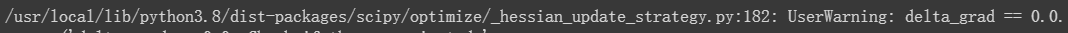

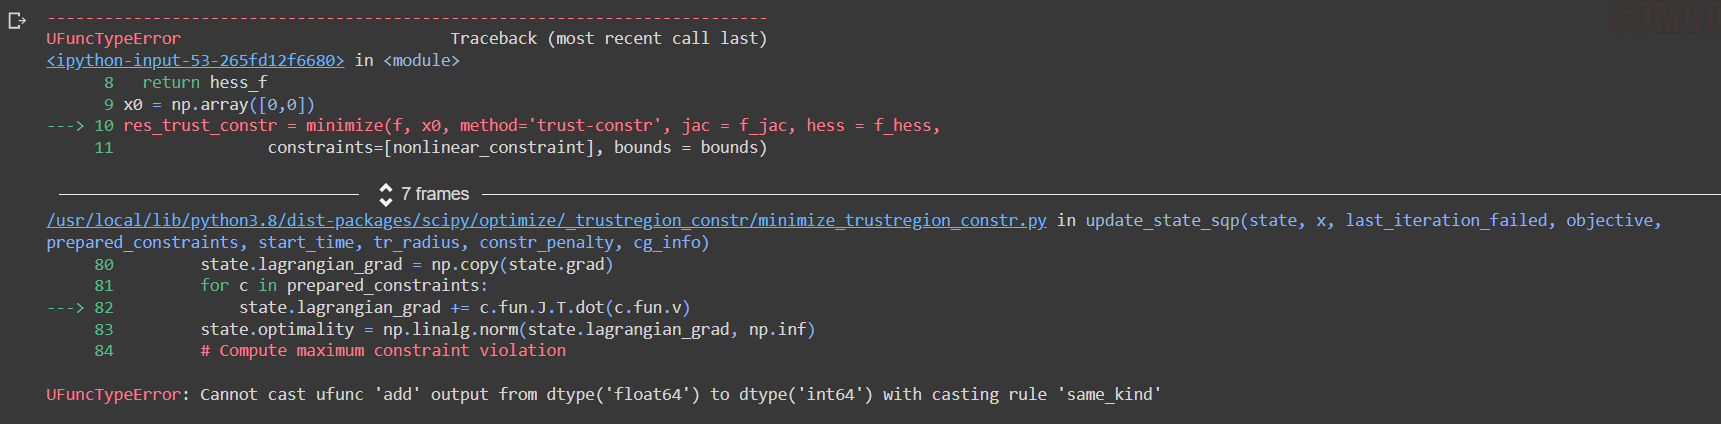

這邊還發現一個bug，如果今天f_jac裡面的jac_f設定得值不是float，而是整數，它會抱錯。

In [ ]:
def f_jac(x):
  jac_f = [-1.0,-1.0]
  return jac_f
def f_hess(x):
  hess_f = [[0,0],[0,0]]
  return hess_f

In [ ]:
from scipy.optimize import minimize
#建立f_der anf f_hessian

x0 = np.array([0,0])
res_trust_constr = minimize(f, x0, method='trust-constr', jac = f_jac, hess = f_hess,
               constraints=[nonlinear_constraint], bounds = bounds)

### Print out the result you get

輸出收斂最小值的位置，還有其輸出其細節

In [ ]:
print(res_trust_constr.x) 
print(res_trust_constr)

[0.61157004 3.44188615]
 barrier_parameter: 0.00016000000000000007
 barrier_tolerance: 0.00016000000000000007
          cg_niter: 12
      cg_stop_cond: 4
            constr: [array([-0.00013077, -0.00090313]), array([0.61157004, 3.44188615])]
       constr_nfev: [13, 0]
       constr_nhev: [17, 0]
       constr_njev: [12, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.04849648475646973
               fun: -4.053456193171002
              grad: array([-1., -1.])
               jac: [array([[-2.63859589,  1.        ],
       [20.60958198,  1.        ]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([4.46148515e-10, 7.67958097e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 13
              nhev: 12
               nit: 17
             niter: 17
              njev: 12
        optimality: 7.679580969516438e-09
            status: 1
           success: True
         

### Apply COBYLA method

resources: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


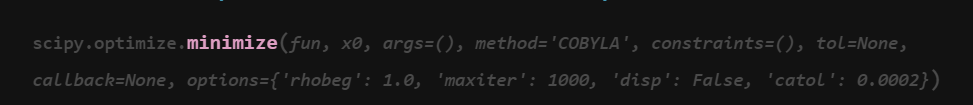

COBYLA全名為 Constrained Optimization by Linear Approximations




根據網站上的圖片(上圖)，可以得知此方法不需要使用object function的jacobian and hessian，所以就直接將需要的函數放入，然後分別輸出其收斂值與細節輸出。

In [ ]:
# TODO
x0 = [0,0]
res_cobyla = minimize(f, x0, method = 'COBYLA', constraints= [nonlinear_constraint])
print(res_cobyla.x)
print(res_cobyla)

[0.61160344 3.44210482]
     fun: -4.053708258184975
   maxcv: 3.7853620753480755e-06
 message: 'Optimization terminated successfully.'
    nfev: 19
  status: 1
 success: True
       x: array([0.61160344, 3.44210482])


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_constraints.py:356: OptimizeWarning: Constraint options `finite_diff_jac_sparsity`, `finite_diff_rel_step`, `keep_feasible`, and `hess`are ignored by this method.
  warn("Constraint options `finite_diff_jac_sparsity`, "


$$
Jacobian\quad constrained = \begin{bmatrix} \frac{\partial c_1}{\partial x_1} && \frac{\partial c_1}{\partial x_2} \\ \frac{\partial c_2}{\partial x_1} && \frac{\partial c_2}{\partial x_2} \end{bmatrix}
= \begin{bmatrix} -8x_1^3+24x_1^2 -16x_1 && 1 \\ -16x_1^3+96x_1^2-176x_1+96 && 1 \end{bmatrix}\\\\
$$
$$
Hessian\quad constrained = v_1 \begin{bmatrix} \frac{\partial^2 c_1}{\partial x_1^2} && \frac{\partial^2 c_1}{\partial x_1\partial x_2} \\ \frac{\partial^2 c_1}{\partial x_1\partial x_2} && \frac{\partial^2 c_1}{\partial x_2^2}\end{bmatrix} + v_2 \begin{bmatrix} \frac{\partial^2 c_2}{\partial x_1^2} && \frac{\partial^2 c_2}{\partial x_1\partial x_2} \\ \frac{\partial^2 c_2}{\partial x_1\partial x_2} && \frac{\partial^2 c_2}{\partial x_2^2} \end{bmatrix}
= v_1 \begin{bmatrix} -24x_1^2+48x_1 -16 && 0 \\ 0 && 0 \end{bmatrix} + v_2 \begin{bmatrix} -48x_1^2+192x_1-176 && 0 \\ 0 && 0 \end{bmatrix}\\
$$
上面的$v_1$和$v_2$為lagrange multipliers。

## Report

#### COBYLA

Resource:https://handwiki.org/wiki/COBYLA ; https://www.docdroid.net/QTS9gns/powell1994-pdf


其工作原理為，先使用線性近似來逼近問題，所以會進行疊代，透過疊代找到最優解，並且置信域約束會限制每一次改變量，這時再使用目標函數跟constrain function，得出新的數據，這個新數據點將用來改善下一次疊代，如果無法改善下一次疊代(優化)，則減少步長(這邊所謂的步長指的就是置信域半徑)，直到步長小於一定的值，就算收斂成功。

在低變數時是此法相當好用，但如果變數變多，則會造成線性近似效率降低。 

此方法可以在不使用導數下，進行計算








#### trust-constr

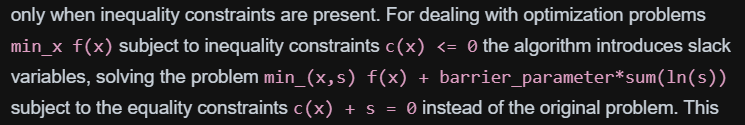

resources:https://epubs.siam.org/doi/epdf/10.1137/S1052623497325107

此方法用來解決非線性問題，又叫做interior point algorithms，使用sequential quadratic programming and trust regions來解決每次疊代後會出現的子問題，會用到barrier parameters(barrior subproblem)，是會將原本的object function + barrier_parameter*sum(ln(s)) (s為slack number)，barrier parameter會越變越小，直到比barrier_tol更小

#### Compare two algorithms



COBYLA是一個可以運用在沒有導數的非線性constraint的疊代算法，只需要輸入目標函數和限制函數就可以計算其最小值，但使用對象的變數也不能太多，否則其計算效率會很低

trust-constr需要使用到jacobian and hessian來運算，但其可以解決較為複雜的問題，比如說變數比較多的目標函數。

總結: 能解決較為複雜問題的方法，代表需要更多的輸入函數幫其運算(比如說trust-constr的hessian and jacobian)，所以數值最佳化就是透過目標問題，來選擇哪一個方法較好，當然也可以選擇較為全面的最佳化法，但這樣會變成割雞焉用牛刀，或許只要使用cobyla就可以解決問題了。